In [1]:
# Import the necessary modules and libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from IPython.display import Image  
from six import StringIO  
import pydot
from matplotlib.colors import ListedColormap
from sklearn import tree
import graphviz

In [2]:
seed = 42
np.random.seed(seed)

### Gerando o dataset.

+ A função `make_regression` gera amostras a partir de um modelo linear.


+ O parâmetro `n_informative` controla o número de atributos que têm um impacto real na saída do modelo.


+ O restante dos atributos, `n_features-n_informative` não tem efeito na saída do modelo.


+ O parâmetro `noise` configura o desvio padrão do ruído gaussiano aplicado ao modelo.

In [3]:
# Number of samples
N = 1000

# Create datase.
x, y = make_regression(n_samples=N, n_features=1, n_informative=1, noise=5, random_state=seed)

### Dividindo em conjuntos de treinamento e validação.

In [4]:
# Split the dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

### Modelo linear.

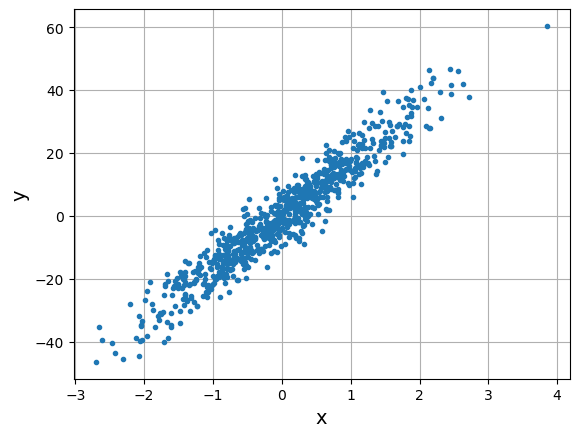

In [5]:
# Plot the noisy data.
plt.plot(x_train, y_train, '.')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

### Usando Grid Search para ajustar os hiperparâmetros `max_depth`e `min_samples_leaf`

+ Grid Search é uma técnica de ajuste fino dos hiperparâmetros.

In [6]:
# Set parameters for grid-search.
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Instantiate a DT object.
reg = DecisionTreeRegressor(random_state=seed)

# Instantiate a Grid Search object.
gs = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Find best hyperparameters.
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [7]:
gs.best_score_

-27.067252508316624

In [8]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 9}

### Comparando a função original e sua aproximação.

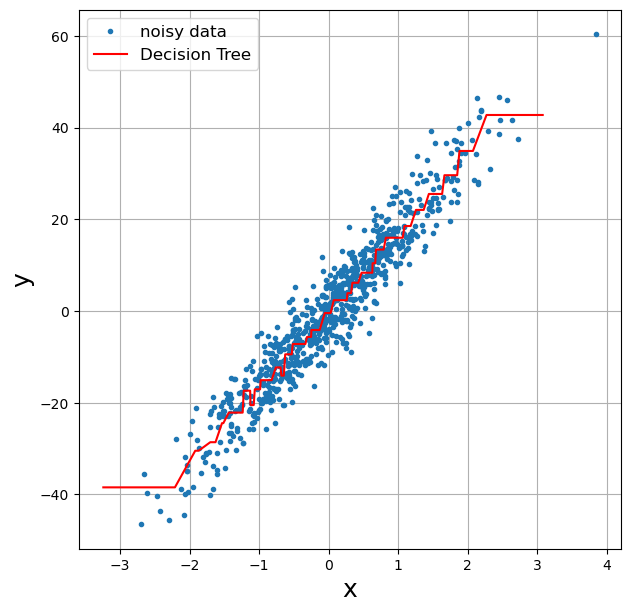

In [9]:
# Plot noisy data plus decision tree.
x_test = np.sort(x_test, axis=0)
y_pred = gs.predict(x_test)

plt.figure(figsize=(7,7))
plt.plot(x_train, y_train, '.', label='noisy data')
plt.plot(x_test, y_pred, 'r-', label='Decision Tree')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('dt_regression.png', dpi=600)
plt.show()

### Visualizando a árvore de decisão.

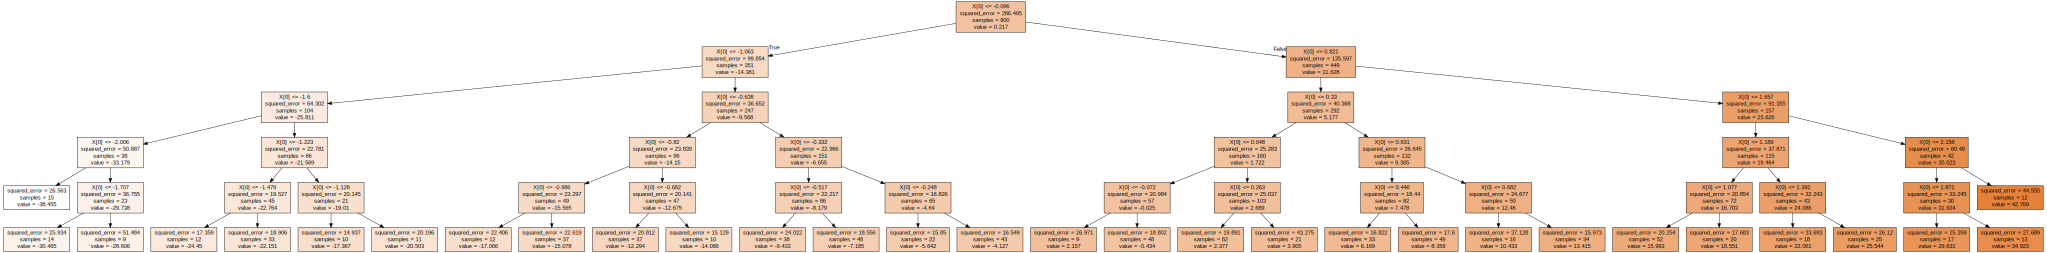

In [10]:
tree_data = tree.export_graphviz(gs.best_estimator_, out_file=None, filled=True)
# Draw graph
graph = graphviz.Source(tree_data, format="png") 
graph

### Salvando uma figura com a árvore de decisão.

In [11]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(gs.best_estimator_, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
# Create png file.
graph[0].write_png("make_regression_dt.png")